# **INTRODUCTION**

Hypothyroidism is a common condition where the thyroid doesn't create and release enough thyroid hormone into your bloodstream. This makes your metabolism slow down. Also called underactive thyroid, hypothyroidism can make you feel tired, gain weight and be unable to tolerate cold temperatures

# **DEFINING OUR QUESTION**

Determining whether or not the patient's symptoms indicate that the patient has hypothyroid

# **METRIC FOR SUCCESS**

1.A boosted decision tree model with accuracy score above 90 %

2.A support Vector Machine model with accuracy score above 90 %

# **UNDERSTANDING CONTEXT**

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

# **RECORDING EXPERIMENTAL DESIGN**

1) Data preparation

2) Data analysis

3) Data modeling

# **RELEVANCE OF DATA**

The provided data was appropriate for the classification analysis that was needed.

# **DATA LOADING**

# **Importing our libraries**

In [1]:
import pandas              as pd
import numpy               as np
import seaborn             as sns
import matplotlib.pyplot   as plt
import matplotlib
import scipy as sp
# A grid layout to place subplots within a figure.
import matplotlib.gridspec as gridspec


import warnings
warnings.filterwarnings('ignore')


import pandas_profiling as pp

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.metrics import mean_squared_error,  r2_score 
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [2]:
def settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [3]:
settings()

Populating the interactive namespace from numpy and matplotlib


# **Loading Data**

In [4]:
# reading the csv file
df =pd.read_csv('hypothyroid.csv')

In [5]:
#previewing first few rows
df.head()

status age sex on_thyroxine query_on_thyroxine on_antithyroid_medication thyroid_surgery query_hypothyroid query_hyperthyroid pregnant sick tumor lithium goitre TSH_measured   TSH T3_measured    T3 TT4_measured TT4 T4U_measured   T4U FTI_measured FTI TBG_measured TBG
0  hypothyroid  72   M            f                  f                         f               f                 f                  f        f    f     f       f      f            y    30           y  0.60            y  15            y  1.48            y  10            n   ?
1  hypothyroid  15   F            t                  f                         f               f                 f                  f        f    f     f       f      f            y   145           y  1.70            y  19            y  1.13            y  17            n   ?
2  hypothyroid  24   M            f                  f                         f               f                 f                  f        f    f     f       f      f            y     0           y  0.20            y   4            y     1            y   0            n   ?
3  hypothyroid  24   F            f                  f                         f               f                 f                  f        f    f     f       f      f            y   430           y  0.40            y   6            y  1.04            y   6            n   ?
4  hypothyroid  77   M            f                  f                         f               f                 f                  f        f    f     f       f      f            y  7.30           y  1.20            y  57            y  1.28            y  44            n   ?

In [6]:
#previewing bottom few rows
df.tail()

status age sex on_thyroxine query_on_thyroxine on_antithyroid_medication thyroid_surgery query_hypothyroid query_hyperthyroid pregnant sick tumor lithium goitre TSH_measured   TSH T3_measured    T3 TT4_measured  TT4 T4U_measured   T4U FTI_measured  FTI TBG_measured TBG
3158  negative  58   F            f                  f                         f               f                 f                  f        f    f     f       f      f            y  5.80           y  1.70            y   86            y  0.91            y   95            n   ?
3159  negative  29   F            f                  f                         f               f                 f                  f        f    f     f       f      f            y  0.80           y  1.80            y   99            y  1.01            y   98            n   ?
3160  negative  77   M            f                  f                         f               f                 f                  f        f    f     f       f      f            y  1.20           y  0.60            y   71            y  0.68            y  104            n   ?
3161  negative  74   F            f                  f                         f               f                 f                  f        f    f     f       f      f            y  1.30           y  0.10            y   65            y  0.48            y  137            n   ?
3162  negative  56   F            t                  f                         f               f                 f                  f        f    f     f       f      f            y     0           y  1.80            y  139            y  0.97            y  143            n   ?

In [7]:
# checking for the shape of our dataset
df.shape

#our dataset has 26 features and  rows 3163

(3163, 26)

In [8]:
#Checking for more information about our dataset in terms of datatypes,null etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [9]:
#column names of the our dataset
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [10]:
#converting the columns to lowercase and removing  spaces
df.columns=df.columns.str.strip().str.lower()
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [11]:
# Checking the number of unique values in the  dataset columns 



for column in df.columns:
  print(df[column].nunique())
  print(column)
  # print(results[column].unique())
  print('\n')

2
status


93
age


3
sex


2
on_thyroxine


2
query_on_thyroxine


2
on_antithyroid_medication


2
thyroid_surgery


2
query_hypothyroid


2
query_hyperthyroid


2
pregnant


2
sick


2
tumor


2
lithium


2
goitre


2
tsh_measured


240
tsh


2
t3_measured


70
t3


2
tt4_measured


269
tt4


2
t4u_measured


159
t4u


2
fti_measured


281
fti


2
tbg_measured


53
tbg




# **DATA CLEANING**

In [12]:
#replacing the '?' in the  column with the mode and confirming if it was changed
#replacing the '?' in the sex column with the mode and confirming if it was changed
df['age']=df['age'].replace(['?'],np.nan)
df['tsh']=df['tsh'].replace(['?'],np.nan)
df['t3']=df['t3'].replace(['?'],np.nan)
df['tt4']=df['tt4'].replace(['?'],np.nan)
df['t4u']=df['t4u'].replace(['?'],np.nan)
df['fti']=df['fti'].replace(['?'],np.nan)
df['tbg']=df['tbg'].replace(['?'],np.nan)


In [13]:
#we will the replace with the mode of each and every column
for column in df.columns:
    df[column].fillna(df[column].mode()[0],inplace=True)

In [14]:
#coverting data from string to numeric
df[['age','tsh','t3','tt4','t4u','fti','tbg']] = df[['age','tsh','t3','tt4','t4u','fti','tbg']].apply(pd.to_numeric)
df.dtypes

status                        object
age                            int64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
tsh_measured                  object
tsh                          float64
t3_measured                   object
t3                           float64
tt4_measured                  object
tt4                          float64
t4u_measured                  object
t4u                          float64
fti_measured                  object
fti                          float64
tbg_measured                  object
tbg                          float64
dtype: object

***Duplicates***

In [15]:
# Checking for duplicates
df.duplicated().sum()

78

In [16]:
#dropping duplicates
df.drop_duplicates(inplace = True)

In [17]:
# Checking for duplicates again
df.duplicated().sum()

0

***Missing values***

In [18]:
#checking for missing values
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
tsh_measured                 0
tsh                          0
t3_measured                  0
t3                           0
tt4_measured                 0
tt4                          0
t4u_measured                 0
t4u                          0
fti_measured                 0
fti                          0
tbg_measured                 0
tbg                          0
dtype: int64

***OUTLIERS***

In [19]:
#Outliers
# checking for outliers using IQR Scores
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

age    fti  fti_measured  goitre  lithium  on_antithyroid_medication  on_thyroxine  pregnant  query_hyperthyroid  query_hypothyroid  query_on_thyroxine    sex   sick  status     t3  t3_measured    t4u  t4u_measured    tbg  tbg_measured  thyroid_surgery    tsh  tsh_measured    tt4  tt4_measured  tumor
0     False   True         False   False    False                      False         False     False               False              False               False  False  False   False  False        False   True         False  False         False            False   True         False   True         False  False
1     False   True         False   False    False                      False         False     False               False              False               False  False  False   False  False        False  False         False  False         False            False   True         False   True         False  False
2     False   True         False   False    False                      False         False     False               False              False               False  False  False   False   True        False  False         False  False         False            False  False         False   True         False  False
3     False   True         False   False    False                      False         False     False               False              False               False  False  False   False   True        False  False         False  False         False            False   True         False   True         False  False
4     False  False         False   False    False                      False         False     False               False              False               False  False  False   False  False        False  False         False  False         False            False   True         False  False         False  False
5     False   True         False   False    False                      False         False     False               False              False               False  False  False   False  False        False  False         False  False         False            False   True         False  False         False  False
6     False  False         False   False    False                      False         False     False               False              False               False  False  False   False  False        False  False         False  False         False            False   True         False  False         False  False
7     False   True         False   False    False                      False         False     False               False              False               False  False  False   False  False        False  False         False  False         False            False   True         False  False         False  False
8     False   True         False   False    False                      False         False     False               False              False               False  False  False   False  False        False  False         False  False         False            False   True         False  False         False  False
9     False   True         False   False    False                      False         False     False               False              False               False  False  False   False  False        False  False         False  False         False            False   True         False   True         False  False
10    False  False         False   False    False                      False         False     False               False              False               False  False  False   False  False        False  False         False  False         False            False   True         False  False         False  False
11    False  False         False   False    False                      False         False     False               False              False               False  False  False   False  False        False  False         False  False         False            False   True         False  False

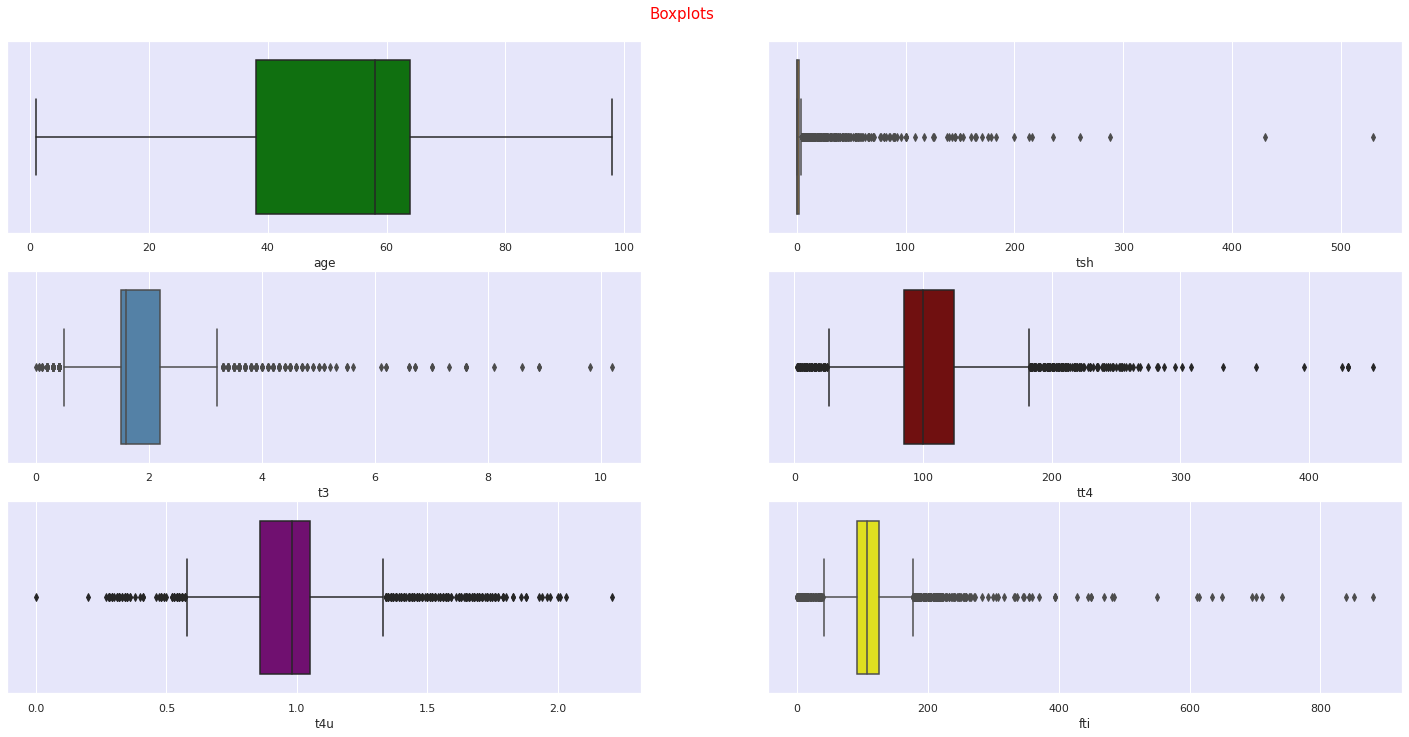

In [20]:
# Creating a list of columns to check for outliers
# Creating a list of colors
#
col_list = ['age','tsh','t3','tt4','t4u','fti']
colors = ['green','orange','steelblue','maroon','purple','yellow']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 3, ncols = 2)
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'red')
for ax, data, column, color in zip(axes.flatten(), df, col_list, colors):
  sns.boxplot(df[column], ax = ax, color = color)
  ax.set_facecolor('lavender')

In [21]:
#checking shape of clean dataset
df.shape

(3085, 26)

In [22]:
#saving our clean dataset
df.to_csv('clean-hypothyroidism',index=False)

# **Encoding categorical columns**

In [23]:
from pandas._libs.algos import diff_2d
pi = LabelEncoder()
df_encoded = df.apply(pi.fit_transform)

df_encoded.head()

status  age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  thyroid_surgery  query_hypothyroid  query_hyperthyroid  pregnant  sick  tumor  lithium  goitre  tsh_measured  tsh  t3_measured  t3  tt4_measured  tt4  t4u_measured  t4u  fti_measured  fti  tbg_measured  tbg
0       0   69    2             0                   0                          0                0                  0                   0         0     0      0        0       0             1  165            1   7             1   22             1  116             1   19             0   23
1       0   12    1             1                   0                          0                0                  0                   0         0     0      0        0       0             1  221            1  18             1   26             1   81             1   26             0   23
2       0   21    2             0                   0                          0                0                  0                   0         0     0      0        0       0             1    0            1   3             1    5             1   68             1    0             0   23
3       0   21    1             0                   0                          0                0                  0                   0         0     0      0        0       0             1  237            1   5             1    8             1   72             1    9             0   23
4       0   74    2             0                   0                          0                0                  0                   0         0     0      0        0       0             1  106            1  13             1   63             1   96             1   48             0   23

# **Descriptive Data analysis**

In [24]:
#general statistical summaries of the numerical variables
df.describe()

age          tsh           t3          tt4          t4u          fti          tbg
count  3085.000000  3085.000000  3085.000000  3085.000000  3085.000000  3085.000000  3085.000000
mean     52.229822     4.954399     1.860227   107.877439     0.977747   114.836921    28.250762
std      18.067948    22.279880     0.875948    42.938958     0.216909    57.834551     5.592797
min       1.000000     0.000000     0.000000     2.000000     0.000000     0.000000     0.000000
25%      38.000000     0.000000     1.500000    85.000000     0.860000    92.000000    28.000000
50%      58.000000     0.400000     1.600000   100.000000     0.980000   107.000000    28.000000
75%      64.000000     1.700000     2.200000   124.000000     1.050000   126.000000    28.000000
max      98.000000   530.000000    10.200000   450.000000     2.210000   881.000000   122.000000

Text(0.5, 1.0, 'Distribution of age')

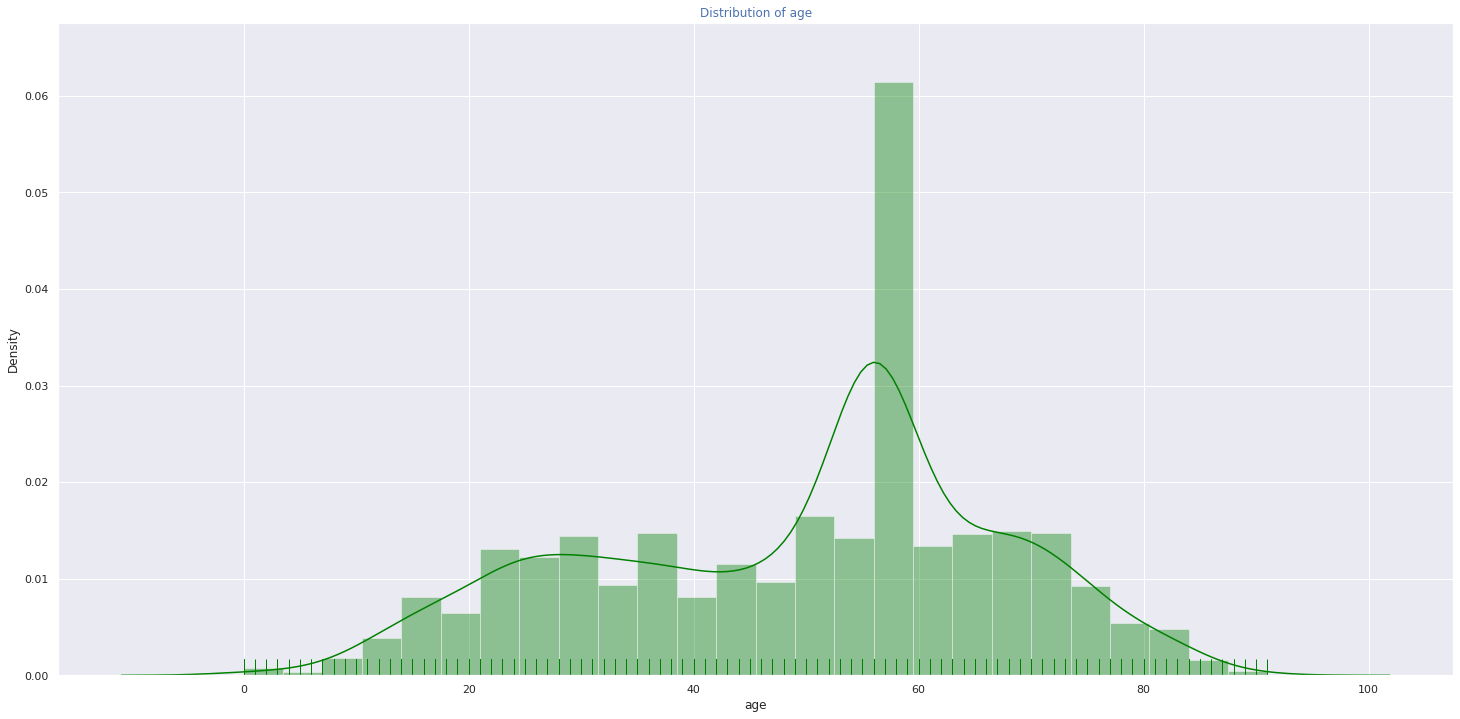

In [25]:

#distribution of the age variable
plt.figure()
plt.subplot()
sns.distplot(df_encoded["age"],color="green",rug=True)

plt.title("Distribution of age",color='b')

Text(0.5, 1.0, 'Distribution of fti')

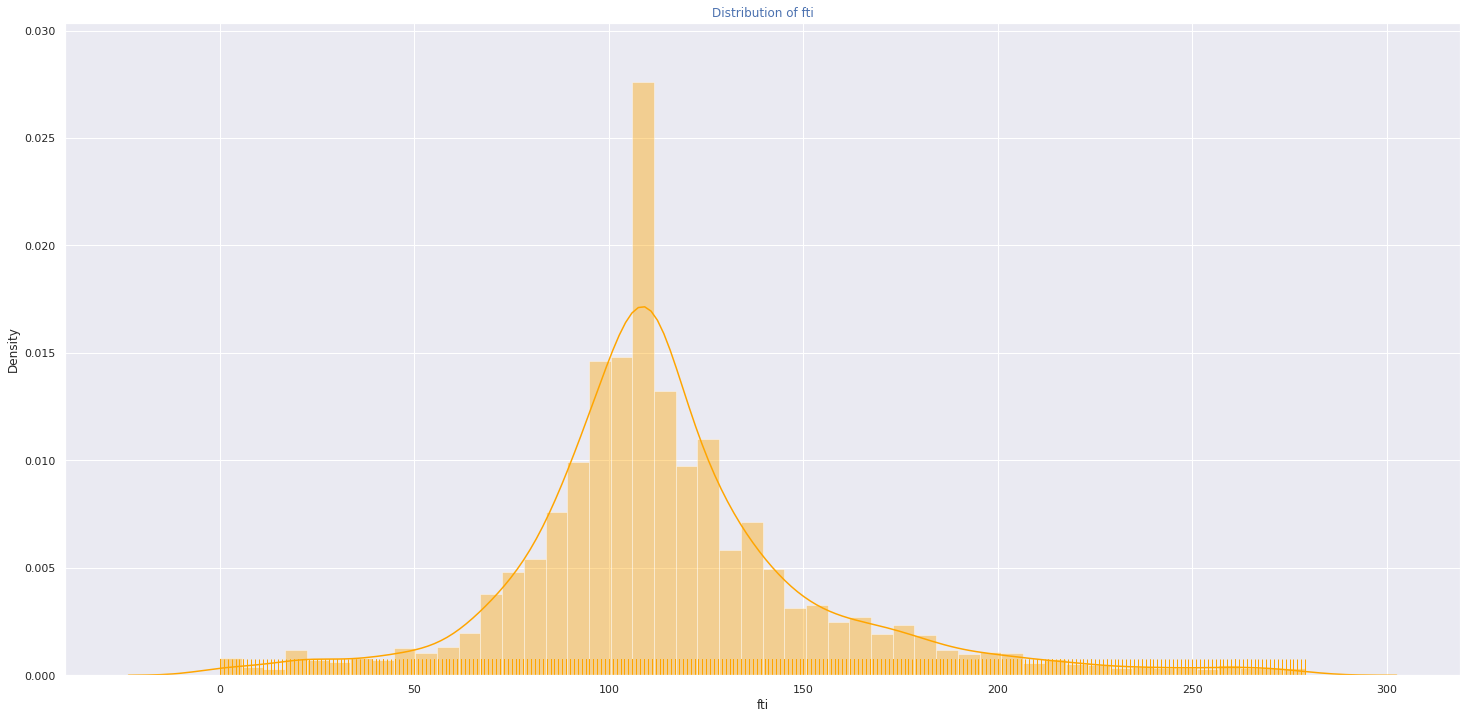

In [26]:

#distribution of the goals for home teams
plt.figure()
plt.subplot()
sns.distplot(df_encoded["fti"],color="orange",rug=True)

plt.title("Distribution of fti",color='b')

Text(0, 0.5, 'Count')

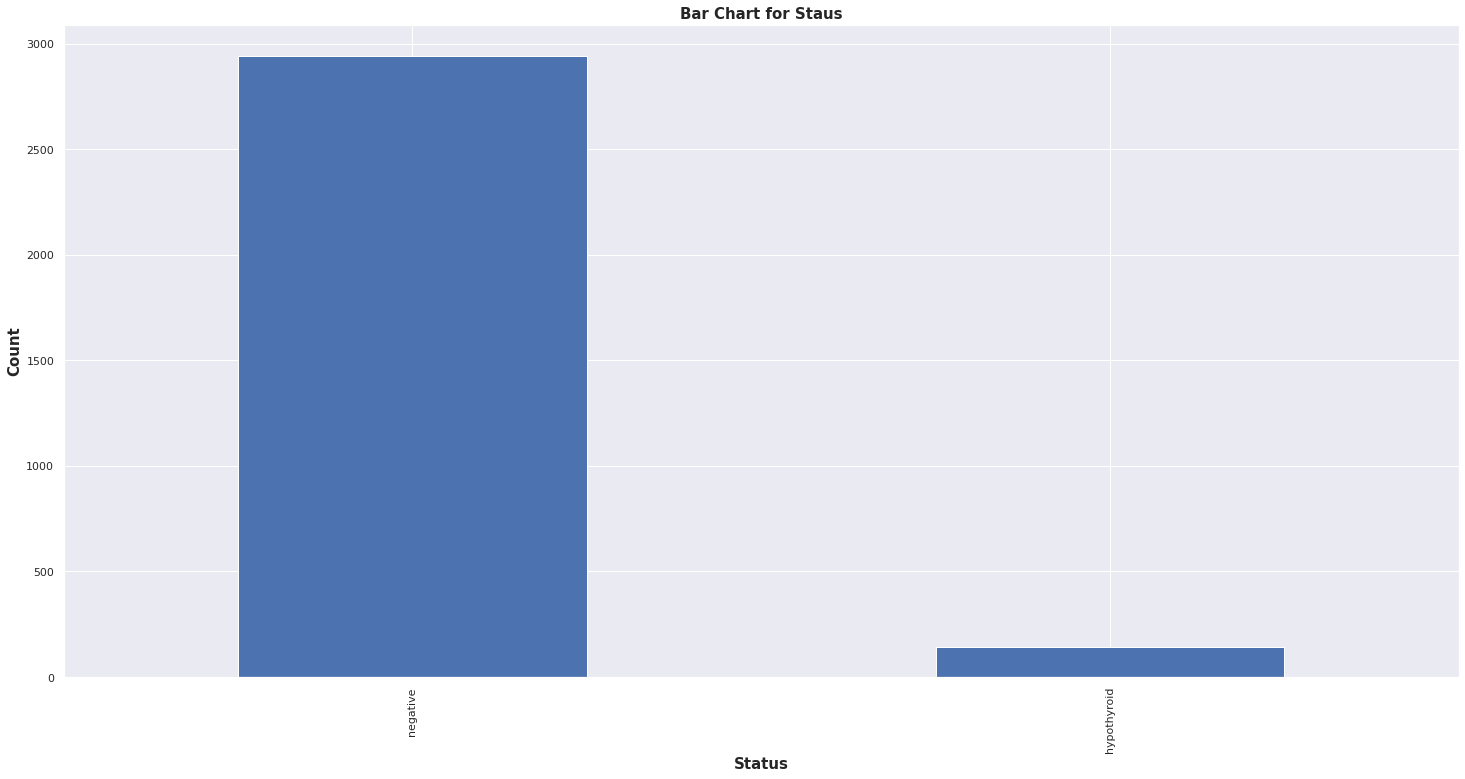

In [27]:
plt.figure()
plotdata = df['status'].value_counts()
plotdata.plot(kind="bar")
plt.title('Bar Chart for Staus', fontweight='bold',fontsize=15)
plt.xlabel('Status',fontweight='bold',fontsize=15)
plt.ylabel('Count',fontweight='bold',fontsize=15)

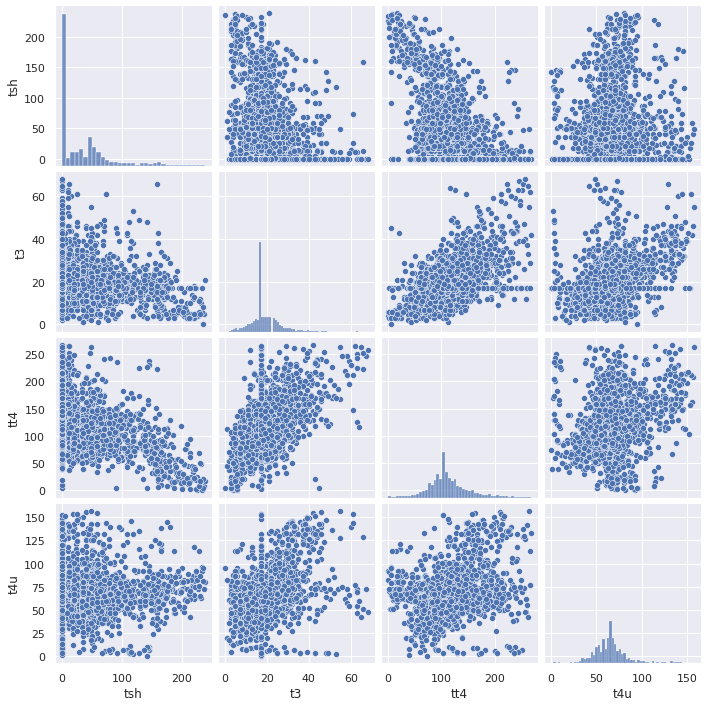

In [28]:
columns =['tsh','t3','tt4','t4u']
sns.pairplot(df_encoded[columns])

In [29]:
#checking for multicolinearity
columns =['age','tsh','t3','tt4','t4u','fti','tbg']

correlations = df[columns].corr()
correlations

age       tsh        t3       tt4       t4u       fti       tbg
age  1.000000  0.011090 -0.231503 -0.078737 -0.205472  0.043327 -0.064255
tsh  0.011090  1.000000 -0.160429 -0.304556  0.072901 -0.239725 -0.009452
t3  -0.231503 -0.160429  1.000000  0.521115  0.378002  0.273469  0.008015
tt4 -0.078737 -0.304556  0.521115  1.000000  0.319433  0.678019  0.017144
t4u -0.205472  0.072901  0.378002  0.319433  1.000000 -0.294331  0.028209
fti  0.043327 -0.239725  0.273469  0.678019 -0.294331  1.000000 -0.005214
tbg -0.064255 -0.009452  0.008015  0.017144  0.028209 -0.005214  1.000000

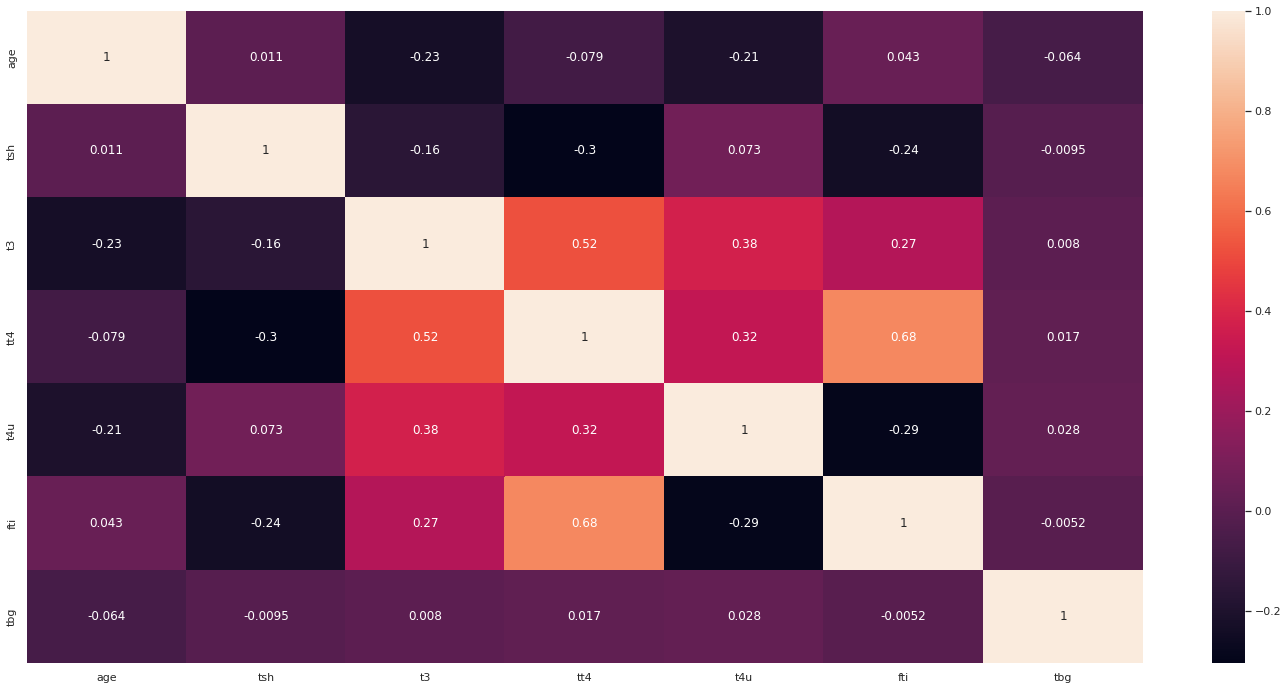

In [30]:
#correlation matrix
#  showing correlation on a heatmap
columns =['age','tsh','t3','tt4','t4u','fti','tbg']
plt.figure()
sns.heatmap(df[columns].corr(),annot=True)
plt.show()

The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Let's use these correlations to compute the VIF score for each variable. This will require a little bit of linear algebra, but the approach is straightforward: we create a new dataframe with the inverse of the matrix above.

In [31]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

age       tsh        t3       tt4       t4u       fti       tbg
age  1.085096 -0.013841  0.236882 -0.088273  0.158348 -0.008317  0.064697
tsh -0.013841  1.170209  0.087822  0.656589 -0.423343 -0.312627  0.008523
t3   0.236882  0.087822  1.546860 -0.424441 -0.486238 -0.267442  0.023252
tt4 -0.088273  0.656589 -0.424441  4.589857 -2.414564 -3.545526 -0.025125
t4u  0.158348 -0.423343 -0.486238 -2.414564  2.745812  2.469853 -0.013115
fti -0.008317 -0.312627 -0.267442 -3.545526  2.469853  4.129500  0.011296
tbg  0.064697  0.008523  0.023252 -0.025125 -0.013115  0.011296  1.004911

# **Data Modelling**

***Decision Trees***

In [32]:
# import Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [33]:
# Split data into train and test sets
X = df_encoded.drop('status', axis=1)
Y = df_encoded['status']

In [34]:
# Determine distribution of target variable
df_encoded['status'].value_counts(normalize=True) * 100

1    95.429498
0     4.570502
Name: status, dtype: float64

In [35]:
# Stratify y
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=23, stratify = Y)

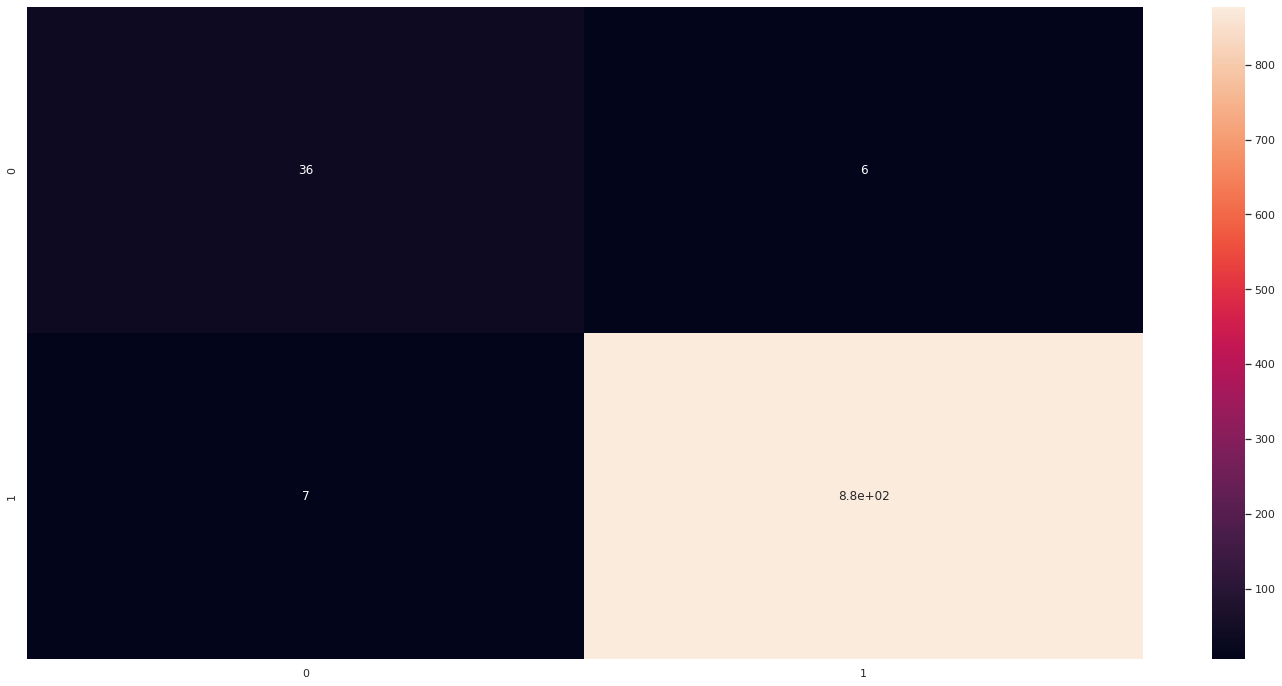

In [36]:
# Intialize and fit random forest model with base parameters
random_classifier = RandomForestClassifier()
random_classifier.fit(x_train, y_train)

# Make predictions
y_pred = random_classifier.predict(x_test)

# Plot confusion matrix
matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[0,1], columns=[0,1])
sns.heatmap(matrix, annot=True)

In [37]:
# Get probabilities for positive outcomes
y_prob = random_classifier.predict_proba(x_test)[:, 1]

# Get auc score
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob)}')

ROC AUC Score: 0.9791666666666667


Text(0, 0.5, 'True Positive rate')

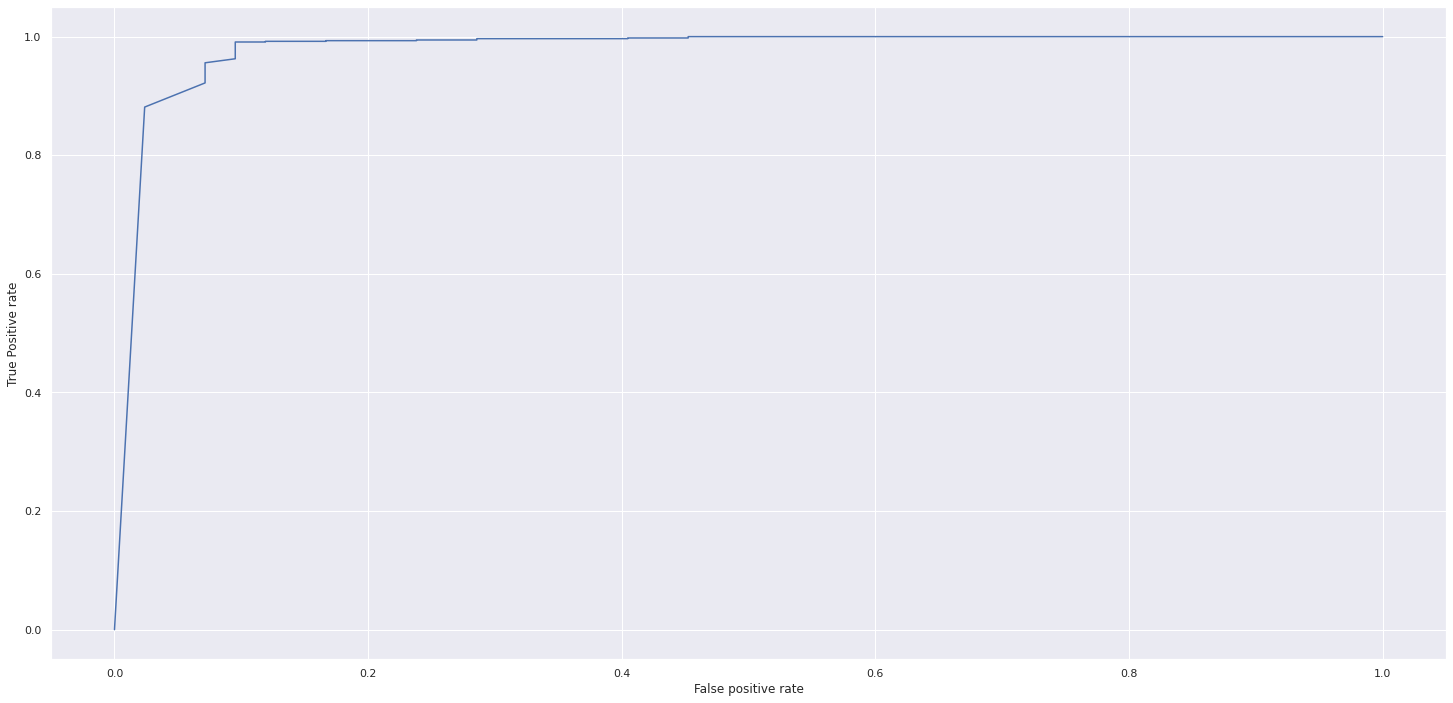

In [38]:
# Plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')

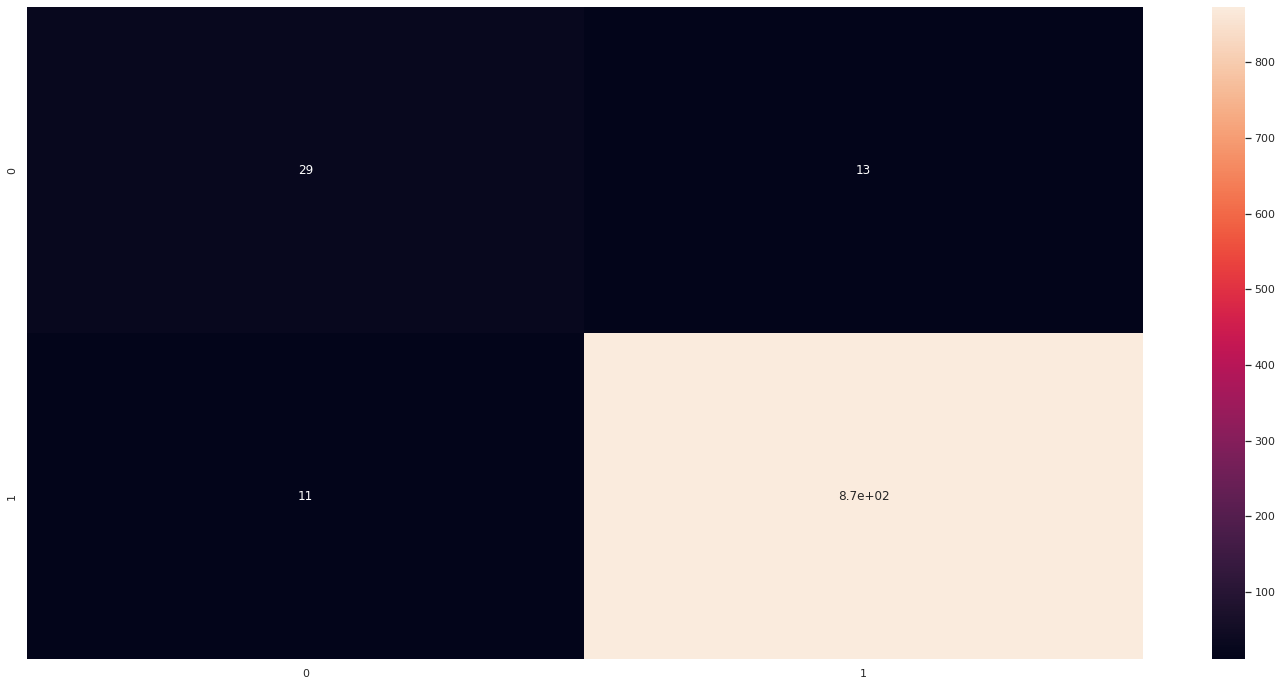

In [39]:
# Intialize and fit adaboost model with a decision tree base model
adaboost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
adaboost_classifier.fit(x_train, y_train)
# Make predictions
y_pred_ada = adaboost_classifier.predict(x_test)

# Plot confusion matrix
matrix_ada = pd.DataFrame(confusion_matrix(y_test, y_pred_ada), index=[0,1], columns=[0,1])
sns.heatmap(matrix_ada, annot=True)

In [40]:
# Get probabilities for positive outcomes
y_prob_ada = adaboost_classifier.predict_proba(x_test)[:, 1]

# Get auc score
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob_ada)}')

ROC AUC Score: 0.9717733247145012


Text(0, 0.5, 'True Positive rate')

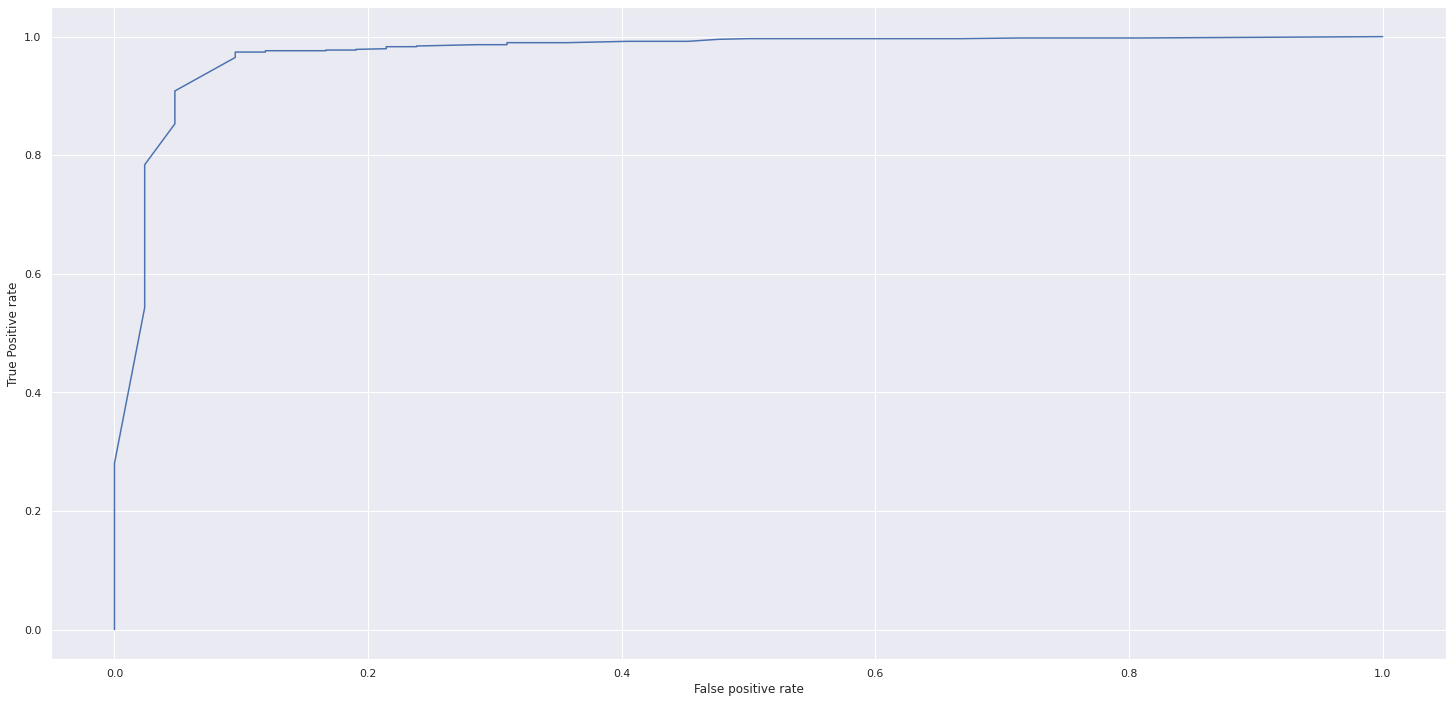

In [41]:
# Plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_ada)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')

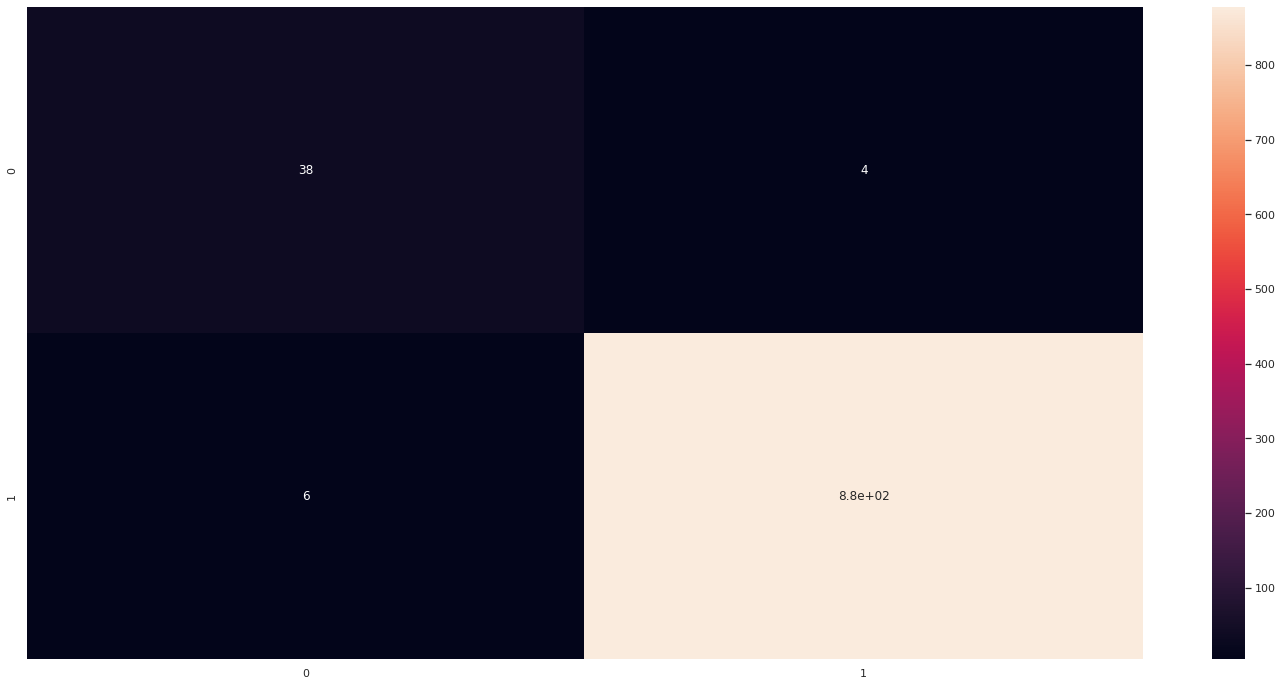

In [42]:
# Intialize and fit gradient boost classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(x_train, y_train)
# Make predictions
y_pred_gb = gb_classifier.predict(x_test)

# Plot confusion matrix
matrix_gb = pd.DataFrame(confusion_matrix(y_test, y_pred_gb), index=[0,1], columns=[0,1])
sns.heatmap(matrix_gb, annot=True)

In [43]:
# Get probabilities for positive outcomes
y_prob_gb = gb_classifier.predict_proba(x_test)[:, 1]

In [44]:
# Get auc score
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob_gb)}')

ROC AUC Score: 0.9823179271708683


Text(0, 0.5, 'True Positive rate')

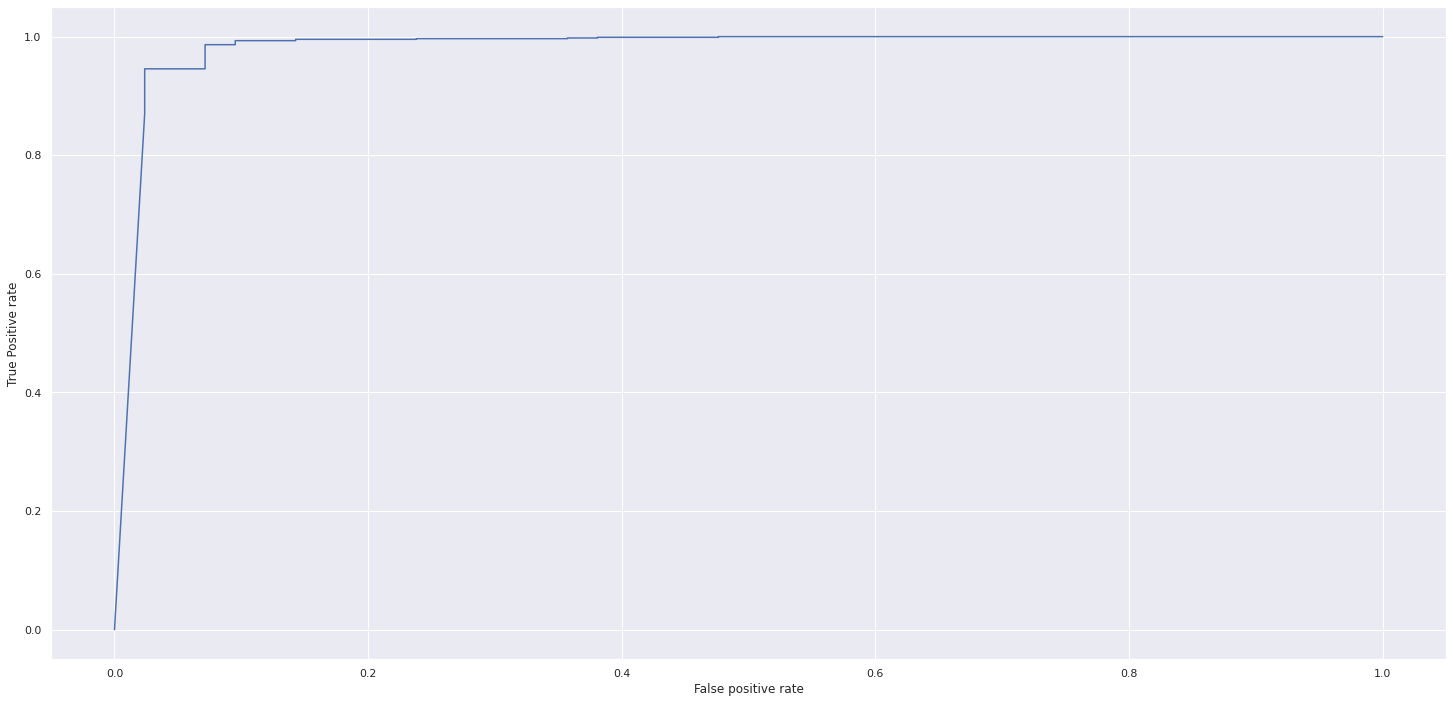

In [45]:
# Plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_gb)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')

Among the 3 models tested, the random forest model has the best performance followed by gradient boosted and adaboost models.

***Hyperparameter Tuning***

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
# Define parameter grid for parameter tuning
param_grid_rand = {
    'max_depth': np.arange(80, 200, 10),
    'min_samples_leaf': [2,3],
    'n_estimators': [100, 200, 300, 500, 800]
}
# Perform cross validation
grid_search_rand = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid_rand, cv = 3, n_jobs = -1, verbose = 0, scoring='roc_auc')

In [48]:
# Get best parameters
grid_search_rand.fit(x_train, y_train)
grid_search_rand.best_params_

{'max_depth': 90, 'min_samples_leaf': 2, 'n_estimators': 100}

In [49]:
# Get best score with tuning
grid_search_rand.best_score_

0.995903062006796

In [50]:
# Tune adaboost model
param_grid_ada = {
    'learning_rate': np.arange(0.7, 1.0, 0.05),
    'n_estimators': [50, 100, 200],
    'base_estimator__max_depth': np.arange(80, 110, 10),
    'base_estimator__min_samples_leaf': [2,3,4]
}
grid_search_ada = GridSearchCV(estimator = AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), param_grid = param_grid_ada, cv = 3, n_jobs = -1, verbose = 0, scoring='roc_auc')

In [51]:
# Get best parameters
grid_search_ada.fit(x_train, y_train)
grid_search_ada.best_params_

{'base_estimator__max_depth': 100,
 'base_estimator__min_samples_leaf': 4,
 'learning_rate': 0.9000000000000001,
 'n_estimators': 200}

In [52]:
# Get best score afer tuning
grid_search_ada.best_score_

0.989577847812408

In [53]:
# Fit random forest classifier and adaboost classifier with best parameters
random_classifier = RandomForestClassifier(max_depth=160, min_samples_leaf=2, n_estimators=300)
adaboost_classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=80, min_samples_leaf=4),learning_rate=0.9500000000000002, n_estimators=200 )

In [54]:
random_classifier.fit(x_train, y_train)
adaboost_classifier.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=80,
                                                         min_samples_leaf=4),
                   learning_rate=0.9500000000000002, n_estimators=200)

Text(0.5, 1.0, 'Feature Importances')

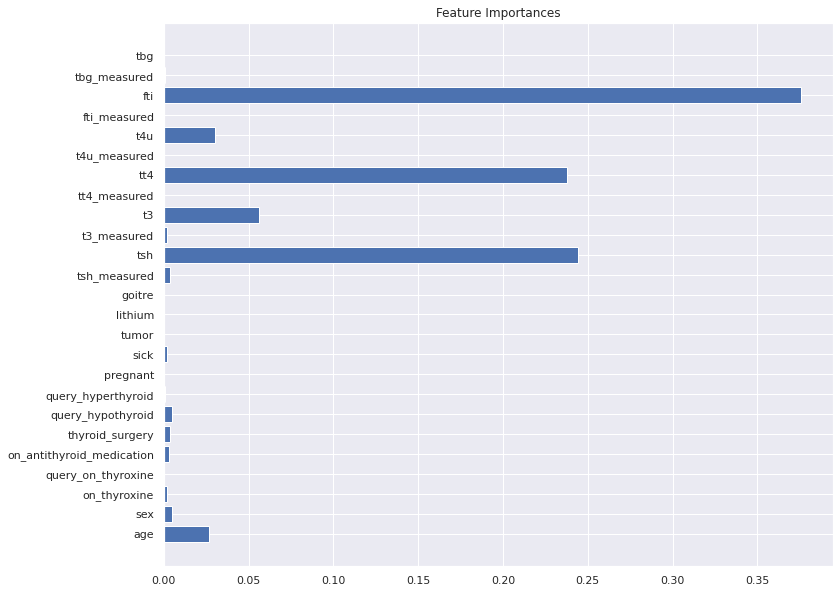

In [55]:
# Rank feature importance
importances = [round(x, 3) for x in random_classifier.feature_importances_]
plt.figure(figsize=(12, 10))
plt.barh(X.columns.to_list(), importances)
plt.title('Feature Importances')

In [56]:
random_forest_features = pd.DataFrame({'Features': X.columns.to_list(), 'Importance': importances})
random_forest_features.sort_values('Importance', ascending=False)

Features  Importance
22                        fti       0.376
14                        tsh       0.244
18                        tt4       0.238
16                         t3       0.056
20                        t4u       0.030
0                         age       0.027
1                         sex       0.005
6           query_hypothyroid       0.005
5             thyroid_surgery       0.004
13               tsh_measured       0.004
4   on_antithyroid_medication       0.003
15                t3_measured       0.002
9                        sick       0.002
2                on_thyroxine       0.002
7          query_hyperthyroid       0.001
23               tbg_measured       0.001
21               fti_measured       0.000
19               t4u_measured       0.000
12                     goitre       0.000
17               tt4_measured       0.000
11                    lithium       0.000
10                      tumor       0.000
8                    pregnant       0.000
3          query_on_thyroxine       0.000
24                        tbg       0.000

The most features in classifying patients in accordance to the random forest classifier are


FTI

TSH

TT4

T3

T4U

age

Text(0.5, 1.0, 'Feature Importances based Adaboost')

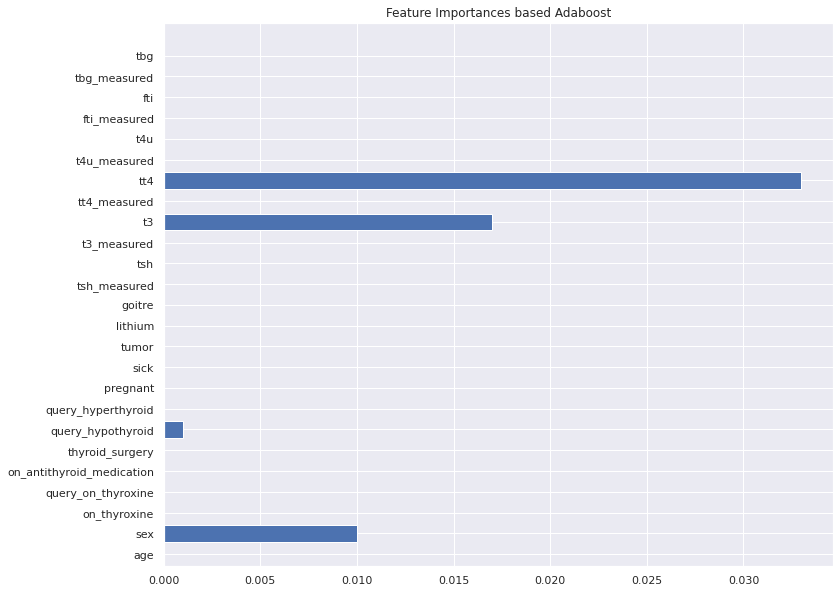

In [57]:
# Rank feature importance
importances_ada = [round(x, 3) for x in adaboost_classifier.feature_importances_]
plt.figure(figsize=(12, 10))
plt.barh(X.columns.to_list(), importances_ada)
plt.title('Feature Importances based Adaboost')

In [58]:
adaboost_features = pd.DataFrame({'Features': X.columns.to_list(), 'Importance': importances_ada})
adaboost_features.sort_values('Importance', ascending=False)

Features  Importance
18                        tt4       0.033
16                         t3       0.017
1                         sex       0.010
6           query_hypothyroid       0.001
12                     goitre       0.000
23               tbg_measured       0.000
21               fti_measured       0.000
19               t4u_measured       0.000
17               tt4_measured       0.000
15                t3_measured       0.000
13               tsh_measured       0.000
11                    lithium       0.000
2                on_thyroxine       0.000
10                      tumor       0.000
9                        sick       0.000
8                    pregnant       0.000
7          query_hyperthyroid       0.000
5             thyroid_surgery       0.000
4   on_antithyroid_medication       0.000
3          query_on_thyroxine       0.000
24                        tbg       0.000
0                         age         NaN
14                        tsh         NaN
20                        t4u         NaN
22                        fti         NaN

The most important features based on the adaboost classifier are:

T3

TT4

T4U

age

query_hypothyroid

on_thyroxine

# **Support Vector Machines**

According to the tuned random forest and adaboost models, the best feature in classifying patients are: FTI, T3, TSH, TT4, T4U, age, sick and on_thyroxine. To train our svm model, fit it with these features as well as features selected via PCA

In [59]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [63]:
# Define features and target variable
tree_features =df_encoded[['fti', 't3', 'tsh', 'tt4', 't4u', 'age', 'sick', 'on_thyroxine']]
thyroid_pca = df_encoded.drop('status', axis=1)
Y = df_encoded['status']

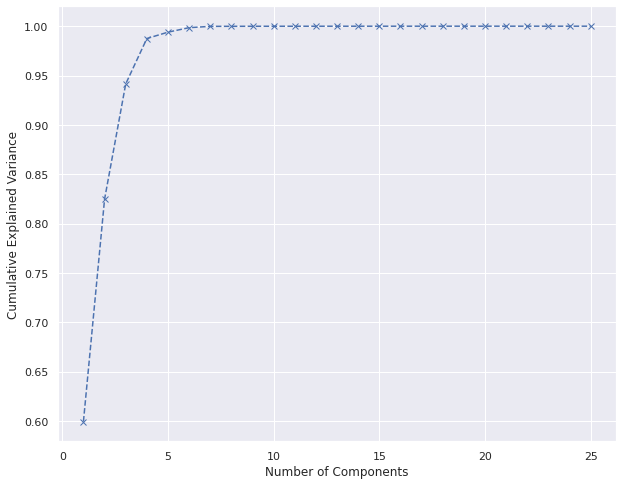

In [64]:
# Apply pca
pca = PCA().fit(thyroid_pca)

# getting the explained variance ratio
evr = pca.explained_variance_ratio_
range_length = len(evr) + 1

# plotting the explained variance ratio so we can determine how any principal components to keep
plt.figure(figsize = (10, 8))
plt.plot(__builtin__.range(1, range_length), evr.cumsum(), marker = 'x', linestyle = '--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

Approximately 4 features explain 95% of variance in our data

In [65]:
# Reduce our feature set to components
pca_x = PCA(n_components=4).fit_transform(thyroid_pca)

In [66]:
# Split our data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(pca_x, Y, test_size=.3, stratify=Y)
x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(tree_features, Y, test_size=.3, stratify=Y)

In [67]:
# Standard features
scaler_tree = StandardScaler().fit(x_train_tree)
x_train_tree = scaler_tree.transform(x_train_tree)
x_test_tree = scaler_tree.transform(x_test_tree)

scaler_pca = StandardScaler().fit(x_train)
x_train = scaler_pca.transform(x_train)
x_test = scaler_pca.transform(x_test)

***Fitting Model: Sigmoid Function***

In [68]:
# Build model with a sigmoid kernel 
svc_pca = SVC(kernel='sigmoid', probability=True).fit(x_train, y_train)
svc_tree = SVC(kernel = 'sigmoid', probability=True).fit(x_train_tree, y_train_tree)

In [69]:
# Get the roc_auc scoresl
# Get probabilities for positive outcomes
y_prob_pca = svc_pca.predict_proba(x_test)[:, 1]
y_prob_tree = svc_tree.predict_proba(x_test_tree)[:, 1]

In [70]:
# Get auc score
print(f'ROC AUC Score with PCA reduced data: {roc_auc_score(y_test, y_prob_pca)}')
print(f'ROC AUC Score with tree features: {roc_auc_score(y_test_tree, y_prob_tree)}')

ROC AUC Score with PCA reduced data: 0.8616677440206852
ROC AUC Score with tree features: 0.8706367162249515


Features selected by decison trees have better performance than the pca reduced data. However the support vector model perform extremely well and is almost at par with the tree models.

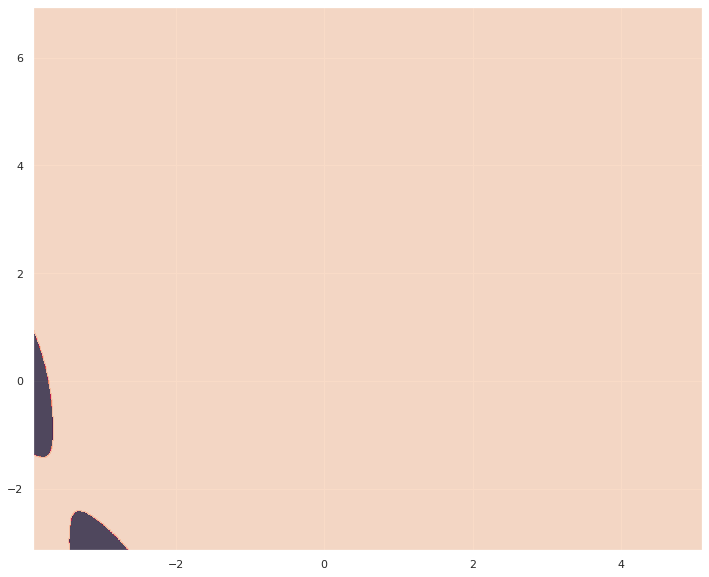

In [78]:
plt.figure(figsize=(12, 10))

X1, X2 = np.meshgrid(np.arange(start = x_test_tree[:, 0].min() - 1, stop = x_test_tree[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_test_tree[:, 1].min() - 1, stop = x_test_tree[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in __builtin__.range(6)]).T
pred = svc_tree.predict(Xpred).reshape(X1.shape)   # is a matrix of 0's and 1's !
plt.contourf(X1, X2, pred,
             alpha = 0.75)

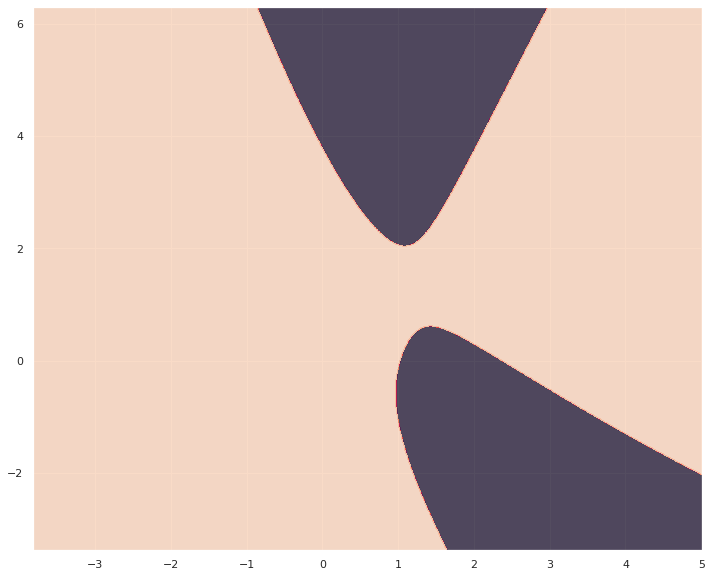

In [80]:
plt.figure(figsize=(12, 10))

X1, X2 = np.meshgrid(np.arange(start = x_test[:, 0].min() - 1, stop = x_test[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_test[:, 1].min() - 1, stop = x_test[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in __builtin__.range(2)]).T
pred = svc_pca.predict(Xpred).reshape(X1.shape)   # is a matrix of 0's and 1's !
plt.contourf(X1, X2, pred,
             alpha = 0.75)

The sigmoid kernel, distictly separates the tree feature data and performs moderately well on the pca data.

***Fitting Model: Polynomial Function***

In [83]:
# Build model with a polynomial kernel 
svc_pca = SVC(kernel='poly',degree=3,gamma='auto', probability=True).fit(x_train, y_train)
svc_tree = SVC(kernel='poly',degree=3,gamma='auto', probability=True).fit(x_train_tree, y_train_tree)

In [84]:
# Get the roc_auc scoresl
# Get probabilities for positive outcomes
y_prob_pca = svc_pca.predict_proba(x_test)[:, 1]
y_prob_tree = svc_tree.predict_proba(x_test_tree)[:, 1]


# Get auc score
print(f'ROC AUC Score with PCA reduced data: {roc_auc_score(y_test, y_prob_pca)}')
print(f'ROC AUC Score with tree features: {roc_auc_score(y_test_tree, y_prob_tree)}')

ROC AUC Score with PCA reduced data: 0.972217733247145
ROC AUC Score with tree features: 0.9918659771600948


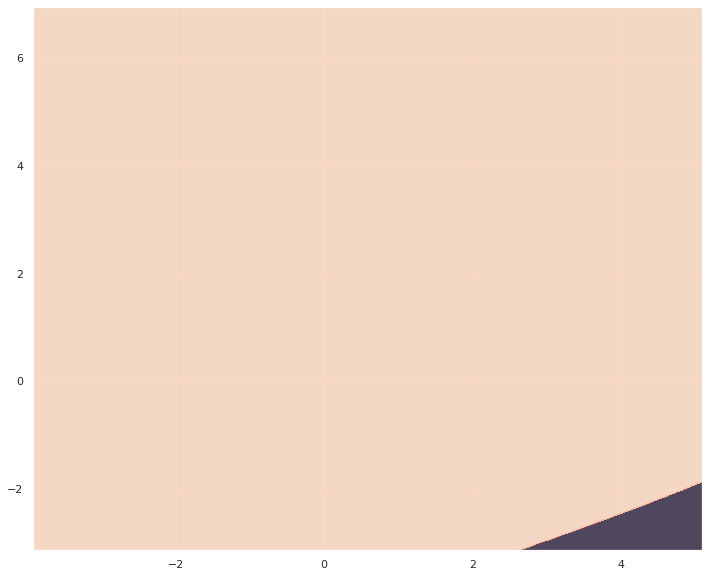

In [85]:
plt.figure(figsize=(12, 10))

X1, X2 = np.meshgrid(np.arange(start = x_test_tree[:, 0].min() - 1, stop = x_test_tree[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_test_tree[:, 1].min() - 1, stop = x_test_tree[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in __builtin__.range(6)]).T
pred = svc_tree.predict(Xpred).reshape(X1.shape)   # is a matrix of 0's and 1's !
plt.contourf(X1, X2, pred,
             alpha = 0.75)

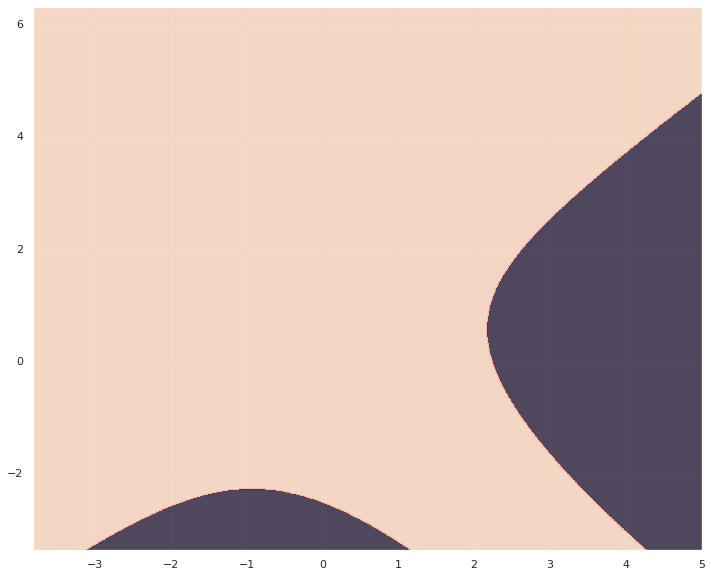

In [86]:
plt.figure(figsize=(12, 10))

X1, X2 = np.meshgrid(np.arange(start = x_test[:, 0].min() - 1, stop = x_test[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_test[:, 1].min() - 1, stop = x_test[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in __builtin__.range(2)]).T
pred = svc_pca.predict(Xpred).reshape(X1.shape)   # is a matrix of 0's and 1's !
plt.contourf(X1, X2, pred,
             alpha = 0.75)

***Fitting Model: RBF Function***

In [87]:
# Build model with an rbf kernel 
svc_pca = SVC(kernel='rbf', probability=True).fit(x_train, y_train)
svc_tree = SVC(kernel = 'rbf', probability=True).fit(x_train_tree, y_train_tree)

In [88]:
# Get the roc_auc scoresl
# Get probabilities for positive outcomes
y_prob_pca = svc_pca.predict_proba(x_test)[:, 1]
y_prob_tree = svc_tree.predict_proba(x_test_tree)[:, 1]


# Get auc score
print(f'ROC AUC Score with PCA reduced data: {roc_auc_score(y_test, y_prob_pca)}')
print(f'ROC AUC Score with tree features: {roc_auc_score(y_test_tree, y_prob_tree)}')

ROC AUC Score with PCA reduced data: 0.9738202973497091
ROC AUC Score with tree features: 0.9836780866192631


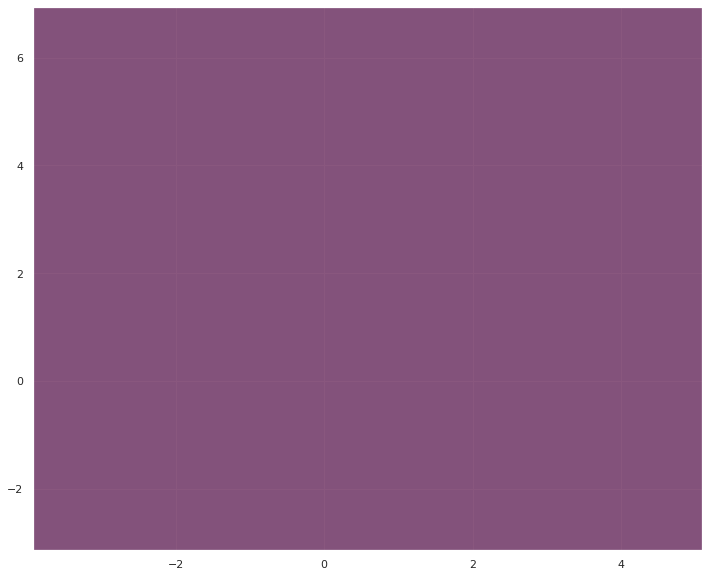

In [89]:
plt.figure(figsize=(12, 10))

X1, X2 = np.meshgrid(np.arange(start = x_test_tree[:, 0].min() - 1, stop = x_test_tree[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_test_tree[:, 1].min() - 1, stop = x_test_tree[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in __builtin__.range(6)]).T
pred = svc_tree.predict(Xpred).reshape(X1.shape)   # is a matrix of 0's and 1's !
plt.contourf(X1, X2, pred,
             alpha = 0.75)

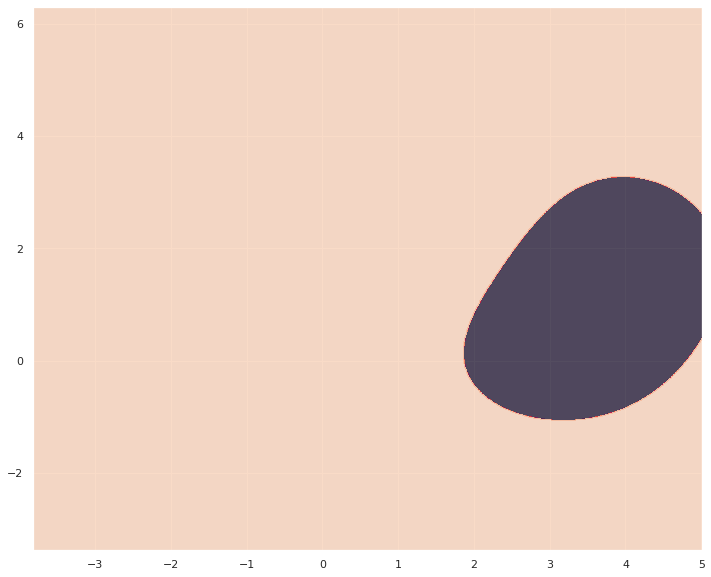

In [90]:
plt.figure(figsize=(12, 10))

X1, X2 = np.meshgrid(np.arange(start = x_test[:, 0].min() - 1, stop = x_test[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_test[:, 1].min() - 1, stop = x_test[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in __builtin__.range(2)]).T
pred = svc_pca.predict(Xpred).reshape(X1.shape)   # is a matrix of 0's and 1's !
plt.contourf(X1, X2, pred,
             alpha = 0.75)

The best performing kernel is the polynomial function kernel on the PCA reduced data. A close second being the rbf kernel on both the PCA reduced data and the tree selected features.

# **Conclusion**

After comparison between PCA reduced data and features selected using the Random Forest and Adaboost models, the PCA reduced data has better performance in the polynomial and rbf kernels. Random forest and adaboost models have relatively the same roc_auc score after hyperparameter tuning. ROC_AUC is a more appropriate metric for our data due to the high imbalance between classes in our target variable. To handle this stratified sampling is also applied during the train test split.

# **Challenging the solution.**
a) Did we have the right question?
Yes.

b) Did we have the right data?
Yes. The data available was suitable for analysis.

c) What can be done to improve the solution?
Tuning of the support vector machine with the polynomial kernel.